# Decision Tree

This is a Python notebook for Decision Tree Study. The main purpose is to practice how to use Python Library to build up a decision tree classifier and make predicitons based on our own data.

After completing this course, you will know:

- How to prepare and load data
- How to run basic data processing for categorical data
- How to build up a decision tree classfier
- How to visualize a decision tree
- How to make prediction

Tianyu
Spring, 2021
v 1.0

## Lab 1: Classify Fruits

### Prepare Data

Load Sklearn and other useful Python Library

In [1]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import OrdinalEncoder

from sklearn import tree

import matplotlib.pyplot as plt

In [2]:
# an array (list of list) hold raw data
training_data = [
    ['Green', 3, 'Apple'],
    ['Yellow', 3, 'Apple'],
    ['Red', 1, 'Grape'],
    ['Red', 1, 'Grape'],
    ['Yellow', 3, 'Lemon'],
]

training_data

[['Green', 3, 'Apple'],
 ['Yellow', 3, 'Apple'],
 ['Red', 1, 'Grape'],
 ['Red', 1, 'Grape'],
 ['Yellow', 3, 'Lemon']]

## Load Data
We will use `pandas` API to preprocess our data. So, let's convert the **array** to `pandas` `Dataframe`.


In [3]:
# assign column name
data_column_name = ['color', 'diameter', 'label']

# create a pandas DataFrame
data = pd.DataFrame(training_data, columns = data_column_name)
target_name = list(set(data.label))

# preview data frame
data.head()

,color,diameter,label
0,Green,3,Apple
1,Yellow,3,Apple
2,Red,1,Grape
3,Red,1,Grape
4,Yellow,3,Lemon


### Pre-processing

Machine learning models require all input and output variables to be numeric.

This means that if our data contains categorical data, we must encode it into numbers before we can fit and evaluate a model.

One of the most popular techniques is an Ordinal Encoding.

**Ordinal Encoding**

In ordinal encoding, each **unique category value** is assigned an **integer value**.
For example, `“red” is 1, “green” is 2, and “blue” is 3`.

This is called an ordinal encoding or an integer encoding and is easily reversible. Often, integer values starting at zero are used.

We will use `sklearn.preprocessing` library to convert our categorical data.

In [4]:
label_enc = OrdinalEncoder()
feature_enc = OrdinalEncoder()

label_enc.fit(data[['label']])
feature_enc.fit(data[['color']])

data.label = label_enc.transform(data[['label']])
data.color = feature_enc.transform(data[['color']])


label_enc.categories_, feature_enc.categories_

([array(['Apple', 'Grape', 'Lemon'], dtype=object)],
 [array(['Green', 'Red', 'Yellow'], dtype=object)])

In [5]:
data.head()

,color,diameter,label
0,0.0,3,0.0
1,2.0,3,0.0
2,1.0,1,1.0
3,1.0,1,1.0
4,2.0,3,2.0


Now our data has converted into a numerical form.

Next, we need to select our data feature and label for our machine learning classifier

In [6]:
feature_name = ['color', 'diameter']

training_feature = data[feature_name]
training_label = data[['label']]

In [7]:
training_feature

,color,diameter
0,0.0,3
1,2.0,3
2,1.0,1
3,1.0,1
4,2.0,3


In [8]:
training_label

,label
0,0.0
1,0.0
2,1.0
3,1.0
4,2.0


## Build up Trees

In [9]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(training_feature, training_label)

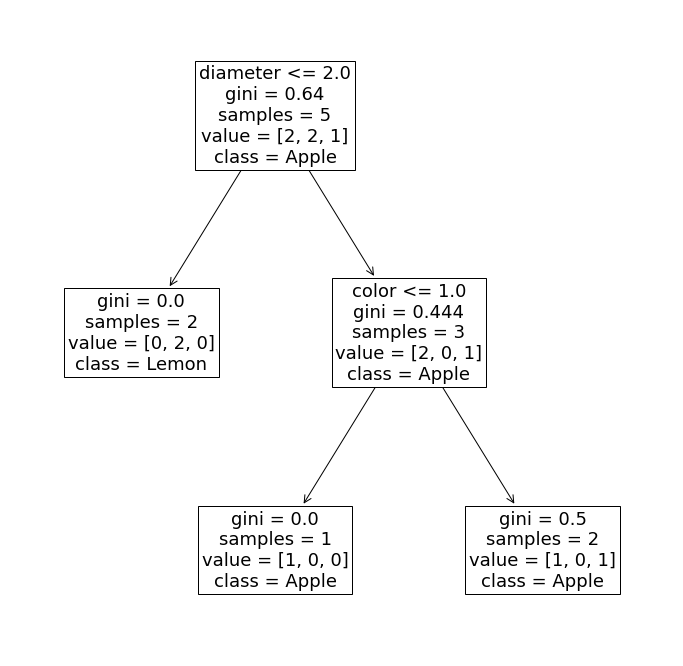

In [10]:



plt.figure(figsize=(12,12)) 
tree.plot_tree(clf, feature_names=feature_name, class_names=target_name,  impurity=True,
                          fontsize = 18, filled=False) 
plt.show()

## Make Prediction

In [11]:
test_data = [
    ['Green', 3],
    ['Yellow', 3],
    ['Red', 1],
]

test = pd.DataFrame(test_data, columns = ['color', 'diameter'])
test

,color,diameter
0,Green,3
1,Yellow,3
2,Red,1


In [12]:
# encode categorical data
test.color = feature_enc.transform(test[['color']])
test

,color,diameter
0,0.0,3
1,2.0,3
2,1.0,1


In [13]:
# make prediction using decision tree classifier
result_pred = clf.predict(test)
result_pred

array([0., 0., 1.])

In [14]:
# convert encoded result back to textual format
for item in result_pred:
    print(label_enc.inverse_transform([[item]]))

[['Apple']]
[['Apple']]
[['Grape']]


---
## Lab 2: Classify Fruits with more data & features

Enrich Data with new features

In [15]:
data_new = [
    ['Sour', 'Green', 3, 'Apple'],
    ['Sweet', 'Yellow', 3, 'Apple'],
    [ 'Sweet', 'Red', 1, 'Grape'],
    [ 'Sweet', 'Red', 1, 'Grape'],
    ['Sour', 'Yellow', 3, 'Lemon'],
    ['Sweet', 'Red', 3, 'Apple']
]

df = pd.DataFrame(data_new, columns = ['taste', 'color', 'diameter', 'label'])

df.head()

,taste,color,diameter,label
0,Sour,Green,3,Apple
1,Sweet,Yellow,3,Apple
2,Sweet,Red,1,Grape
3,Sweet,Red,1,Grape
4,Sour,Yellow,3,Lemon


In [16]:
# pre-processing

feature_enc = OrdinalEncoder()
label_enc = OrdinalEncoder()

feature_enc.fit(df[['taste','color']])
label_enc.fit(df[['label']])


df[['taste','color']] = feature_enc.transform(df[['taste','color']])
df[['label']] = label_enc.transform(df[['label']])


df.head()

,taste,color,diameter,label
0,0.0,0.0,3,0.0
1,1.0,2.0,3,0.0
2,1.0,1.0,1,1.0
3,1.0,1.0,1,1.0
4,0.0,2.0,3,2.0


In [17]:
# feature selction
feature_name = ['taste', 'color', 'diameter']

training_feature = df[feature_name]
training_label = df[['label']]

# build decision tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(training_feature, training_label)

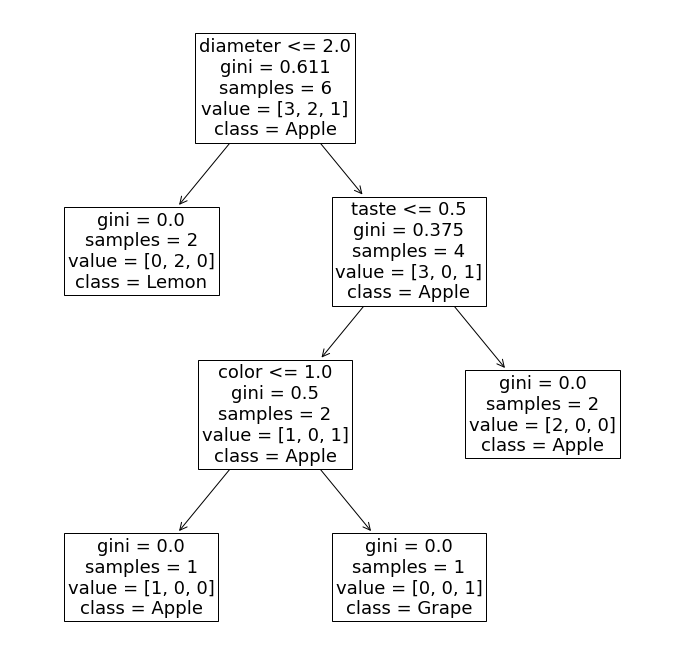

In [18]:
# draw best decision tree
plt.figure(figsize=(12,12)) 
tree.plot_tree(clf, feature_names=feature_name, class_names=target_name,  impurity=True,
                          fontsize = 18, filled=False) 
plt.show()

In [19]:
# test with new unlabel data
test_raw = [
    ['Sweet', 'Red', 3],
    ['Sour', 'Green', 3],
    ['Sour', 'Yellow', 3],
    ['Sweet', 'Yellow', 3],
    [ 'Sweet', 'Red', 1],

]

test = pd.DataFrame(test_raw, columns = ['taste', 'color', 'diameter'])

test[['taste','color']] = feature_enc.transform(test[['taste','color']])

In [20]:
# predict and decode back to textual label
pred = clf.predict(test)
    
pred_decoded = label_enc.inverse_transform(pred.reshape(-1,1)).flatten()
pred_decoded

array(['Apple', 'Apple', 'Lemon', 'Apple', 'Grape'], dtype=object)

In [21]:
# print with formatted output
for feature, label in zip(test_raw, pred_decoded):
    print('[%18s]' % ', '.join(map(str, feature)), "  === predict ===>  " + label)

[     Sweet, Red, 3]   === predict ===>  Apple
[    Sour, Green, 3]   === predict ===>  Apple
[   Sour, Yellow, 3]   === predict ===>  Lemon
[  Sweet, Yellow, 3]   === predict ===>  Apple
[     Sweet, Red, 1]   === predict ===>  Grape
